# 데이터 전처리 과정
---
<br>

### 1. 기사 크롤링
### 2. kiwipie를 통한 전처리(정규화, 토큰화, 불용어 제거 등)
### 3. collections의 counter를 사용해서 쉽게 주어만을 빼서 넣은 리스트를 사용 빈도와 함께 들어간 딕셔너리로 만들기
### 4. 워드클라우드로 마무리

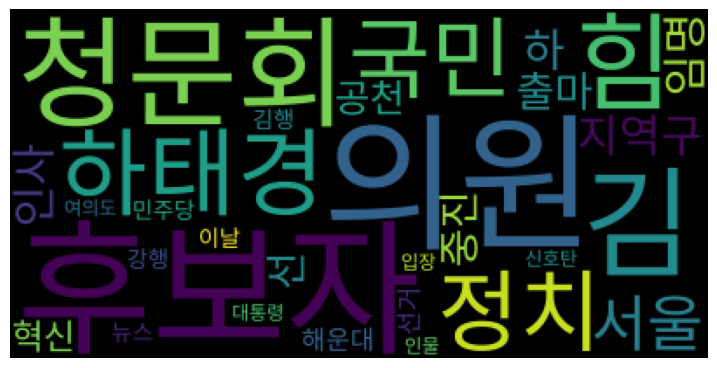

In [24]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


chrome_options = Options()
chrome_options.add_argument("--incognito")
driver = webdriver.Chrome(options=chrome_options)
url="https://v.daum.net/v/20231009220110276"
driver.get(url)
page_source=driver.page_source
soup = BeautifulSoup(page_source, 'html.parser')

news=soup.find('div', class_='article_view').find('section').text
driver.quit()


kiwi = Kiwi()
stopwords=Stopwords()

news=kiwi.tokenize(news, stopwords=stopwords)

nouns=[]
for i in news:
    if i[1].find("N")==0:
        nouns.append(i[0])

nouns=dict(Counter(nouns).most_common(30))

wc = WordCloud (max_words=30,
           background_color='black',
           font_path = "C:/Users/jeeho/OneDrive/문서/GitHub/AI-Programing-Practice/2. 데이터 정제 & 시각화/NotoSansKR.ttf")

wc.generate_from_frequencies(nouns)
plt.figure(figsize=(9,9))
plt.imshow(wc)
plt.axis('off')
plt.show()